In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df0=pd.read_csv("meteo-vid-2018.csv", engine="python")
df1=pd.read_csv("flujos-vid-2018.csv", engine="python")

In [20]:
lati = 0.504725
long = 1.942737
altu = 101
mes = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]

In [21]:
df0.dtypes

Date                 object
Time                 object
batt_volt_Min       float64
logger_temp         float64
short_up_Avg        float64
short_dn_Avg        float64
long_up_Avg         float64
long_dn_Avg         float64
cnr4_T_C_Avg        float64
cnr4_T_K_Avg        float64
long_up_corr_Avg    float64
long_dn_corr_Avg    float64
Rs_net_Avg          float64
Rl_net_Avg          float64
albedo_Avg           object
Rn_Avg              float64
AirTC_Avg           float64
RH                  float64
WS_ms_S_WVT         float64
WindDir_D1_WVT      float64
WindDir_SD1_WVT     float64
Temp_C_Avg(1)       float64
Temp_C_Avg(2)       float64
Temp_C_Avg(3)       float64
Temp_C_Avg(4)        object
H. suelo 60         float64
Result2_Avg         float64
T. suelo 60 cm      float64
Result4_Avg         float64
Result5_Avg         float64
Result6_Avg         float64
Result7_Avg         float64
Result8_Avg         float64
Result9_Avg         float64
Riego               float64
dtype: object

In [22]:
meteo=df0.filter(items=["Date","Time","WS_ms_S_WVT", "AirTC_Avg","RH","Rs_net_Avg","albedo_Avg"],axis=1)
meteo.dropna(axis=0,how='all',inplace=True)
meteo['Fecha']=meteo['Date'] + ' ' + meteo['Time']
meteo.drop(['Date', 'Time'],axis=1,inplace=True)

In [23]:
meteo['albedo_Avg'] = meteo['albedo_Avg'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
meteo['Fecha'] = pd.to_datetime(meteo['Fecha'],format='%d/%m/%Y %H:%M:%S')
meteo['Mes']= meteo['Fecha'].dt.month
meteo['Dia']= meteo['Fecha'].dt.day
meteo

,WS_ms_S_WVT,AirTC_Avg,RH,Rs_net_Avg,albedo_Avg,Fecha,Mes,Dia
0,2.33,27.75,20.61,36.01,0.00,2018-01-06 17:00:00,1,6
1,3.12,26.57,25.25,22.34,0.00,2018-01-06 17:30:00,1,6
2,2.54,25.01,26.45,1.40,0.00,2018-01-06 18:00:00,1,6
3,2.01,23.65,29.22,-3.15,-0.16,2018-01-06 18:30:00,1,6
4,2.14,22.84,31.08,-2.84,-0.15,2018-01-06 19:00:00,1,6
5,1.05,22.02,31.85,-2.23,-0.05,2018-01-06 19:30:00,1,6
6,0.81,21.01,34.80,-2.30,-0.04,2018-01-06 20:00:00,1,6
7,0.24,20.18,37.47,-2.38,-0.14,2018-01-06 20:30:00,1,6
8,1.88,18.20,39.41,-2.78,-0.08,2018-01-06 21:00:00,1,6
9,1.73,17.61,41.29,-2.86,-0.08,2018-01-06 21:30:00,1,6


In [24]:
meteo["Vel_viento"]=round(meteo.groupby(['Mes'])['WS_ms_S_WVT'].transform(np.mean),2)

meteo["Tempmax_aire"]=round(meteo.groupby(['Mes','Dia'])['AirTC_Avg'].transform(np.max),2)
meteo["Tempmin_aire"]=round(meteo.groupby(['Mes','Dia'])['AirTC_Avg'].transform(np.min),2)
meteo["Tmax_aire"]=round(meteo.groupby(['Mes'])['Tempmax_aire'].transform(np.mean),2)
meteo["Tmin_aire"]=round(meteo.groupby(['Mes'])['Tempmin_aire'].transform(np.mean),2)
meteo["Tprom_aire"]=round(meteo.groupby('Mes')['AirTC_Avg'].transform(np.mean),2)

meteo["Tempmax_rh"]=round(meteo.groupby(['Mes','Dia'])['RH'].transform(np.max),2)
meteo["Tempmin_rh"]=round(meteo.groupby(['Mes','Dia'])['RH'].transform(np.min),2)
meteo["RHmax"]=round(meteo.groupby(['Mes'])['Tempmax_rh'].transform(np.mean),2)
meteo["RHmin"]=round(meteo.groupby(['Mes'])['Tempmin_rh'].transform(np.mean),2)
meteo["RHprom"]=round(meteo.groupby(['Mes'])['RH'].transform(np.mean),2)

meteo["RS"]=round(meteo.groupby(['Mes'])['Rs_net_Avg'].transform(np.mean),2)

meteo['Albedo'] = round(meteo.groupby(['Mes'])['albedo_Avg'].transform(np.mean),2)

meteo=meteo.filter(items=['Fecha','Vel_viento','Tmax_aire','Tmin_aire','Tprom_aire','RHmax','RHmin','RHprom','RS','Albedo'],axis=1)
meteo.head()

,Fecha,Vel_viento,Tmax_aire,Tmin_aire,Tprom_aire,RHmax,RHmin,RHprom,RS,Albedo
0,2018-01-06 17:00:00,1.94,27.34,7.5,16.96,66.38,14.06,38.47,111.86,-0.42
1,2018-01-06 17:30:00,1.94,27.34,7.5,16.96,66.38,14.06,38.47,111.86,-0.42
2,2018-01-06 18:00:00,1.94,27.34,7.5,16.96,66.38,14.06,38.47,111.86,-0.42
3,2018-01-06 18:30:00,1.94,27.34,7.5,16.96,66.38,14.06,38.47,111.86,-0.42
4,2018-01-06 19:00:00,1.94,27.34,7.5,16.96,66.38,14.06,38.47,111.86,-0.42


In [25]:
lat=[]
lon=[]
alt=[]
for i in range (1,13):
    lat.append(lati)
    lon.append(long)
    alt.append(altu)
    
df = pd.DataFrame({"Latitud (rad)":lat,"Longitud (rad)":lon,"Elevación (m)":alt})
df

,Latitud (rad),Longitud (rad),Elevación (m)
0,0.504725,1.942737,101
1,0.504725,1.942737,101
2,0.504725,1.942737,101
3,0.504725,1.942737,101
4,0.504725,1.942737,101
5,0.504725,1.942737,101
6,0.504725,1.942737,101
7,0.504725,1.942737,101
8,0.504725,1.942737,101
9,0.504725,1.942737,101


In [26]:
meteo=meteo.drop_duplicates(subset=['Vel_viento','Tmax_aire','Tmin_aire','RHmax','RHmin','RHprom','RS'])
meteo.drop(meteo.columns[0],axis=1,inplace=True)
meteo=meteo.reset_index(drop=True)
meteo2=pd.concat([df,meteo],axis=1)
meteo2

,Latitud (rad),Longitud (rad),Elevación (m),Vel_viento,Tmax_aire,Tmin_aire,Tprom_aire,RHmax,RHmin,RHprom,RS,Albedo
0,0.504725,1.942737,101,1.94,27.34,7.50,16.96,66.38,14.06,38.47,111.86,-0.42
1,0.504725,1.942737,101,1.96,25.32,9.43,17.23,72.54,25.73,48.17,126.35,-0.48
2,0.504725,1.942737,101,1.93,29.52,8.88,19.28,68.36,15.20,36.97,170.11,-0.41
3,0.504725,1.942737,101,2.10,32.67,10.78,21.88,76.59,15.71,40.79,213.42,-0.39
4,0.504725,1.942737,101,2.11,34.13,12.78,23.65,79.97,17.23,44.23,237.18,-0.37
5,0.504725,1.942737,101,2.15,36.97,19.55,28.42,81.38,25.80,50.81,224.64,-0.38
6,0.504725,1.942737,101,2.02,38.42,24.49,31.07,85.18,32.81,57.64,200.42,-0.19
7,0.504725,1.942737,101,1.91,36.99,24.70,30.12,92.54,42.21,68.87,189.47,-0.38
8,0.504725,1.942737,101,1.79,37.58,23.58,29.66,93.10,36.61,66.62,183.13,-0.49
9,0.504725,1.942737,101,1.66,31.35,16.58,23.25,94.84,37.13,68.70,148.39,-0.61


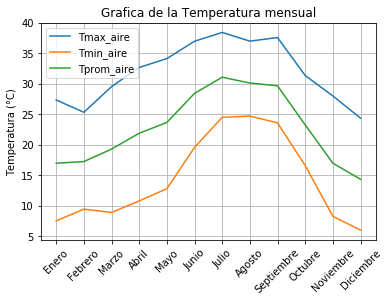

In [27]:
temp = meteo2[["Tmax_aire","Tmin_aire","Tprom_aire"]]
plt.plot(range(0,12),temp)
plt.title("Grafica de la Temperatura mensual")
plt.ylabel("Temperatura (°C)")
plt.legend(temp)
plt.grid()
plt.xticks(np.arange(len(mes)), mes, rotation = 45)
plt.show()

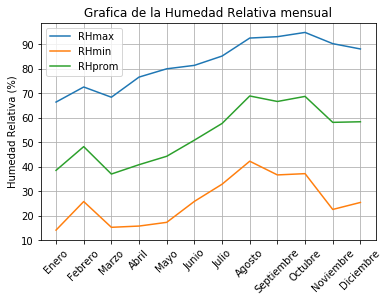

In [28]:
Humedad = meteo2[["RHmax","RHmin","RHprom"]]
plt.plot(range(0,12),Humedad)
plt.title("Grafica de la Humedad Relativa mensual")
plt.ylabel("Humedad Relativa (%)")
plt.legend(Humedad)
plt.grid()
plt.xticks(np.arange(len(mes)), mes, rotation = 45)
plt.show()

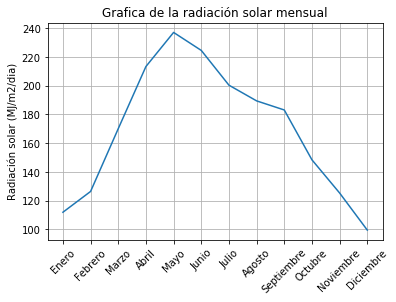

In [29]:
plt.plot(range(0,12),meteo2["RS"])
plt.title("Grafica de la radiación solar mensual")
plt.ylabel("Radiación solar (MJ/m2/dia)")
plt.grid()
plt.xticks(np.arange(len(mes)), mes, rotation = 45)
plt.show()

In [30]:
#Ecuacion 7
ET07 = []
for i in range (0,len(meteo2)):
    ET07.append((0.0252*meteo2['Tprom_aire'][i] + 0.078)*meteo2['RS'][i])


In [31]:
#Ecuacion 31
φ =(np.pi/180)*28.94917
ET031 = []
for i in range (0,len(meteo2)):
    Ec31=(0.0393*(meteo2['RS'][i])*(meteo2['Tprom_aire'][i] + 9.5)**0.5 - 0.19*((meteo2['RS'][i])**0.6)*(φ**0.15) + 0.0061*(meteo2['Tprom_aire'][i] + 20)*(1.11*(meteo2['Tprom_aire'][i]) - meteo2['Tmin_aire'][i] - 2)**0.7)
    ET031.append(Ec31)

In [32]:
#Ecuacion 34
dr = []
δ = []
ω = []

for m in range (0,len(meteo2)):
    j = int(30.4*m - 15)
    dr.append(1 + 0.033*np.cos(((2*np.pi)/365)*j))
    δ.append(0.409*np.sin(((2*np.pi)/365)*j - 1.39))
    ω.append(np.arccos(-np.tan(φ)*np.tan(0.409*np.sin(((2*np.pi)/365)*j - 1.39))))
    
var = pd.DataFrame()
var['dr'] = dr
var['dr'] = var['dr'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
var['δ'] = δ
var['δ'] = var['δ'].apply(lambda col:pd.to_numeric(col, errors='coerce'))
var['ω'] = ω
var['ω'] = var['ω'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

φ = (np.pi/180)*28.94917

Ra = []
for i in range (0,len(meteo2)):
    Ra.append(((24*60)/np.pi)*0.0820*(var['ω'][i]*np.sin(φ)*np.sin(var['δ'][i]) + np.cos(φ)*np.cos(var['δ'][i])*np.sin(var['ω'][i])))

var['Ra'] = Ra
var['Ra'] = var['Ra'].apply(lambda col:pd.to_numeric(col, errors='coerce'))

ET034 = [] 
for i in range (0,len(meteo2)):
    ET034.append(0.051*(1 - meteo2['Albedo'][i])*meteo2['RS'][i]*(meteo2['Tprom_aire'][i] + 9.5)**0.5 - 2.4*(meteo2['RS'][i]/var['Ra'][i])**2 + 0.048*(meteo2['Tprom_aire'][i] + 20)*(1 - meteo2['RHprom'][i]/100)*(0.5 + 0.536*meteo['Vel_viento'][i]) + 0.00012*101)

In [33]:
res = pd.DataFrame()
res['ET07'] = ET07
res['ET031'] = ET031
res['ET034'] = ET034

res['MES']=mes
res.set_index('MES')

,ET07,ET031,ET034
MES,,,
Enero,56.533149,20.782000,-33.811207
Febrero,64.715965,23.492246,-35.870383
Marzo,95.917544,33.370396,-38.708485
Abril,134.321426,44.113275,-20.570613
Mayo,159.854576,50.572906,1.073583
Junio,178.405494,51.426761,27.469696
Julio,172.554405,47.379151,25.472811
Agosto,158.590937,44.042740,35.632141
Septiembre,151.161362,42.352586,35.012981


In [34]:
df1.head()

,Year,DoY,Hour,NEE,LE,H,Rg,Tair,Tsoil,rH,...,Tsoil_fmeth,Tsoil_fwin,PotRad,FP_NEEnight,FP_Temp,E_0,R_ref,Reco,GPP_f,GPP_fqc
0,--,--,--,umolm-2s-1,Wm-2,Wm-2,Wm-2,degC,degC,%,...,-,days,W_m-2,umolm-2s-1,degC,degK,umolm-2s-1,umolm-2s-1,umolm-2s-1,-
1,2018,7,0.5,2.56,11.52,-20.04,-0.87,16.51,20.99,43.83,...,-9999,-9999,0,-9999,16.51,207.66,0.92767,1.00713,-1.0729,1
2,2018,7,1,4.07,15.11,-7.34,-0.97,16.61,21.05,46.82,...,-9999,-9999,0,-9999,16.61,207.66,0.92767,1.01249,-9.62E-01,1
3,2018,7,1.5,0.92,8.61,-9.76,-0.96,16.07,21.09,46.65,...,-9999,-9999,0,-9999,16.07,207.66,0.92767,0.98371,-1.1643,1
4,2018,7,2,0.41,1.93,-8.55,-2.06,16.06,21.09,46.27,...,-9999,-9999,0,-9999,16.06,207.66,0.92767,0.98318,-1.1648,1


In [36]:
df1.dtypes

Year             object
DoY              object
Hour             object
NEE              object
LE               object
H                object
Rg               object
Tair             object
Tsoil            object
rH               object
VPD              object
Ustar            object
Ustar_Thres      object
Ustar_fqc        object
NEE_orig         object
NEE_f            object
NEE_fqc          object
NEE_fall         object
NEE_fall_qc      object
NEE_fnum         object
NEE_fsd          object
NEE_fmeth        object
NEE_fwin         object
LE_orig          object
LE_f             object
LE_fqc           object
LE_fall          object
LE_fall_qc       object
LE_fnum          object
LE_fsd           object
                  ...  
rH_fnum          object
rH_fsd           object
rH_fmeth         object
rH_fwin          object
Tair_orig        object
Tair_f           object
Tair_fqc         object
Tair_fall        object
Tair_fall_qc     object
Tair_fnum        object
Tair_fsd        

In [38]:
df1= df1.apply(pd.to_numeric, errors='coerce')
df1.dtypes

Year             float64
DoY              float64
Hour             float64
NEE              float64
LE               float64
H                float64
Rg               float64
Tair             float64
Tsoil            float64
rH               float64
VPD              float64
Ustar            float64
Ustar_Thres      float64
Ustar_fqc        float64
NEE_orig         float64
NEE_f            float64
NEE_fqc          float64
NEE_fall         float64
NEE_fall_qc      float64
NEE_fnum         float64
NEE_fsd          float64
NEE_fmeth        float64
NEE_fwin         float64
LE_orig          float64
LE_f             float64
LE_fqc           float64
LE_fall          float64
LE_fall_qc       float64
LE_fnum          float64
LE_fsd           float64
                  ...   
rH_fnum          float64
rH_fsd           float64
rH_fmeth         float64
rH_fwin          float64
Tair_orig        float64
Tair_f           float64
Tair_fqc         float64
Tair_fall        float64
Tair_fall_qc     float64


In [40]:
DATA=(np.asarray(df1['Year']-1970, dtype='datetime64[Y]'))+(np.asarray(df1["DoY"], dtype='timedelta64[D]')-1)
df1["FECHA"] = DATA

flujo=pd.DataFrame([])
flujo["FECHA"] = df1["FECHA"]
flujo["FECHA"] = pd.to_datetime(flujo["FECHA"])
flujo["AÑO"] = flujo["FECHA"].dt.year
flujo["MES"] = flujo["FECHA"].dt.month
flujo["DIA"] = flujo["FECHA"].dt.day
flujo["HORA"] = df1["Hour"]

flujo["RnG"] = df1["Rg_f"]
flujo["ET"] = df1["LE_f"]
flujo["H"] = df1["H_f"]

flujo = flujo[flujo["MES"] == 6]
flujo["RnG_prom"] = round(flujo.groupby(["HORA"])["RnG"].transform(np.mean),2)
flujo["ET_prom"] = round(flujo.groupby(["HORA"])["ET"].transform(np.mean),2)
flujo["H_prom"] = round(flujo.groupby(["HORA"])["H"].transform(np.mean),2)

flujo = flujo.drop_duplicates(["HORA"]).reset_index(drop=True)

flujo.head()

,FECHA,AÑO,MES,DIA,HORA,RnG,ET,H,RnG_prom,ET_prom,H_prom
0,2018-06-01,2018.0,6.0,1.0,0.5,-2.34,0.55,-3.82,-1.63,3.19,-7.53
1,2018-06-01,2018.0,6.0,1.0,1.0,-1.74,-0.66,-4.29,-1.61,1.05,-9.65
2,2018-06-01,2018.0,6.0,1.0,1.5,-1.26,9.79,0.74,-1.53,12.86,-8.72
3,2018-06-01,2018.0,6.0,1.0,2.0,-1.67,6.31,5.98,-1.52,13.90,-10.32
4,2018-06-01,2018.0,6.0,1.0,2.5,-1.45,4.38,-5.24,-1.59,13.27,-12.81


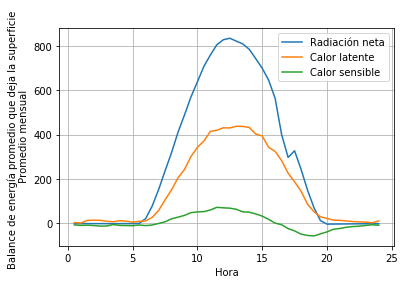

In [44]:
#plt.figure(1, figsize=(8, 5))
x=flujo.HORA
y1=flujo.RnG_prom
y2=flujo.ET_prom
y3=flujo.H_prom
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.ylabel("Balance de energía promedio que deja la superficie \n Promedio mensual")
plt.xlabel("Hora")
plt.legend(('Radiación neta','Calor latente',"Calor sensible"))
plt.grid(True)
plt.show()